In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import VarianceThreshold
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer, make_column_selector
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.naive_bayes import GaussianNB

# Clasificación a partir de Naïve Bayes

In [9]:
data_I = pd.read_csv('./data_identificada.csv')
data_I.head(1)

,index,Name,Netflows,First_Protocol,Second_Protocol,Third_Protocol,p1_d,p2_d,p3_d,duration,...,second_dp,third_dp,p1_ip,p2_ip,p3_ip,p1_ib,p2_ib,p3_ib,Type,Cryptocurrency
0,2189,1123-csves/1.csv,4,UDP,NaN,NaN,0.0,0.0,0.0,0.0,...,41346.0,58136.0,1.0,1.0,1.0,34.25,41.5,48.75,not_mine,Does_not_have


In [10]:
data_I = data_I.drop(['index','Name'], axis = 1)

# Preprocesado

### Eliminar valores ausentes no imputables

In [11]:
data_I = data_I.drop(['Second_Protocol','Third_Protocol'], axis = 1)

### Imputación de valores ausentes

In [12]:
punter = pd.concat([data_I['second_sp'], data_I['second_dp'], data_I['third_sp'], data_I['third_dp']], axis = 1)
imputer = SimpleImputer(missing_values = np.nan, strategy = "median")
value = imputer.fit_transform(punter)

In [13]:
temp = data_I.drop(['second_sp','second_dp','third_sp','third_dp'], axis = 1)
punter = pd.DataFrame(value, columns = punter.columns)

In [14]:
data_I = pd.concat([punter, temp], axis = 1)
data_I.head(1)

,second_sp,second_dp,third_sp,third_dp,Netflows,First_Protocol,p1_d,p2_d,p3_d,duration,...,first_sp,first_dp,p1_ip,p2_ip,p3_ip,p1_ib,p2_ib,p3_ib,Type,Cryptocurrency
0,41346.0,41346.0,58136.0,58136.0,4,UDP,0.0,0.0,0.0,0.0,...,53,53,1.0,1.0,1.0,34.25,41.5,48.75,not_mine,Does_not_have


### Exclusión de variables con varianza próxima a cero

In [15]:
data_numeric = data_I.select_dtypes(include = ['float64', 'int64']).columns.to_list()
data_categoric = data_I.select_dtypes(include = ['object']).columns.to_list()

In [16]:
thresholder = VarianceThreshold(threshold = 0.5)
values = thresholder.fit_transform(data_I[data_numeric])
values

array([[4.13460e+04, 4.13460e+04, 5.81360e+04, ..., 3.42500e+01,
        4.15000e+01, 4.87500e+01],
       [4.44400e+03, 5.87800e+04, 1.23000e+02, ..., 3.97500e+02,
        8.74000e+02, 3.67050e+03],
       [5.18800e+04, 5.18800e+04, 1.23000e+02, ..., 4.30250e+02,
        8.00500e+02, 1.17075e+03],
       ...,
       [4.98750e+04, 4.98750e+04, 1.23000e+02, ..., 2.64175e+03,
        4.93950e+03, 7.23725e+03],
       [8.00000e+01, 8.00000e+01, 5.30000e+01, ..., 3.20000e+01,
        3.70000e+01, 5.42000e+02],
       [8.00000e+01, 8.00000e+01, 5.35300e+03, ..., 3.20000e+01,
        6.40000e+01, 1.27750e+02]])

### Estandarizar

In [17]:
data_numeric = data_I[data_numeric]

In [18]:
preprocessor = ColumnTransformer([
    ('scale', StandardScaler(), data_numeric.columns)
], remainder='passthrough')

In [19]:
values = preprocessor.fit_transform(data_numeric)

In [20]:
data_numeric =  pd.DataFrame(values, columns = data_numeric.columns)
data_numeric.head(1)

,second_sp,second_dp,third_sp,third_dp,Netflows,p1_d,p2_d,p3_d,duration,max_d,...,#sp,#dp,first_sp,first_dp,p1_ip,p2_ip,p3_ip,p1_ib,p2_ib,p3_ib
0,0.766185,0.806796,2.554926,3.664399,-0.491983,-0.700949,-0.804477,-0.960618,-0.488545,-1.268557,...,-0.540526,-0.524864,-0.507407,-0.527309,-0.368592,-0.401682,-0.465767,-0.424466,-0.48806,-0.574012


### Defino mi variable a predecir y mis predictores

In [21]:
y = data_I['Type']
X = data_numeric

### Holdout

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size = 0.7, test_size=0.3, random_state = 1234)

# Naïve Bayes

In [25]:
gnb = GaussianNB()
GNB = gnb.fit(X_train, y_train)

In [27]:
GNB.class_count_

array([1574., 1739.])

In [28]:
GNB.class_prior_

array([0.4750981, 0.5249019])

In [29]:
GNB.theta_

array([[ 0.70733591,  0.69913026, -0.35843129, -0.17392109, -0.48166763,
         0.65547159,  0.63664989,  0.61049056, -0.40242263,  0.52700969,
         0.68141229, -0.3477899 , -0.36013037, -0.37440365, -0.39409598,
        -0.28437181, -0.5558802 , -0.54045313,  0.53264895,  0.55219   ,
         0.36360206,  0.37949388,  0.38498261,  0.43388683,  0.49077448,
         0.51017867],
       [-0.63387844, -0.62699327,  0.28958642,  0.15158484,  0.40532057,
        -0.60814575, -0.59649659, -0.5742263 ,  0.33358076, -0.50321988,
        -0.62490314,  0.2815584 ,  0.3053737 ,  0.3249708 ,  0.37354501,
         0.22586353,  0.47239986,  0.45904857, -0.46505852, -0.48359381,
        -0.35289594, -0.36568614, -0.36862271, -0.41654335, -0.46805284,
        -0.48711049]])

In [31]:
GNB.sigma_

array([[8.11943904e-01, 8.66784148e-01, 3.17823420e-01, 5.59095948e-01,
        1.59271962e-03, 1.21290457e+00, 1.19672071e+00, 1.19235555e+00,
        1.42097681e-03, 1.24085474e+00, 1.19417687e+00, 7.60291988e-04,
        7.04126886e-04, 7.17419179e-03, 2.34350690e-01, 1.14056186e-05,
        2.07354197e-05, 2.10383076e-05, 1.53806217e+00, 1.50818951e+00,
        1.70677833e+00, 1.68617743e+00, 1.66824815e+00, 1.58208927e+00,
        1.50339413e+00, 1.44230168e+00],
       [3.20709552e-01, 2.89326782e-01, 1.35819296e+00, 1.34129357e+00,
        1.27132556e+00, 4.13387653e-02, 9.61599950e-02, 1.60571866e-01,
        1.60427396e+00, 2.77329905e-01, 3.70549310e-05, 9.28353231e-01,
        1.01160809e+00, 1.54502188e+00, 1.45210546e+00, 7.73738732e-01,
        1.28183009e+00, 1.30605090e+00, 6.40027617e-02, 5.59909965e-02,
        7.74858287e-04, 2.80934881e-03, 2.01340600e-02, 9.47784520e-04,
        3.67370848e-03, 3.53280729e-02]])

In [52]:
y_pred = GNB.predict(X_test)
y_pred

array(['not_mine', 'not_mine', 'not_mine', ..., 'not_mine', 'not_mine',
       'not_mine'], dtype='<U8')

In [53]:
y_test.shape, y_pred.shape, y.shape, y_train.shape

((1420,), (1420,), (4733,), (3313,))

In [54]:
print("El modelo de Naïve Bayes se equivocó en %d de los %d registros que componen el dataset original"
      % ((y_test != y_pred).sum(), data_I.shape[0]))

El modelo de Naïve Bayes se equivocó en 15 de los 4733 registros que componen el dataset original


([<matplotlib.axis.YTick at 0x1e0028f4400>,
 <a list of 2 Text yticklabel objects>)

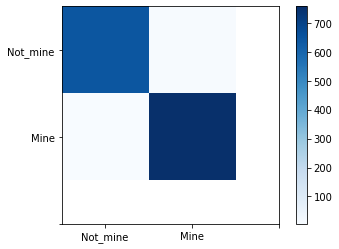

In [57]:
churm = metrics.confusion_matrix(y_test, y_pred)
plt.imshow(churm, cmap=plt.cm.Blues)
plt.colorbar()
tick_marks = np.arange(3)
plt.xticks(tick_marks, ['Not_mine','Mine'])
plt.yticks(tick_marks, ['Not_mine','Mine'])

In [58]:
churm

array([[648,  10],
       [  5, 757]], dtype=int64)

In [59]:
print("Exactitud: ", metrics.accuracy_score(y_test, y_pred))
print("Kappa: ", metrics.accuracy_score(y_test, y_pred))

Exactitud:  0.9894366197183099
Kappa:  0.9894366197183099


In [60]:
print("Precisión     : ", metrics.precision_score(y_test, y_pred, labels=['mine'], average='macro'))
print("Recall        : ", metrics.recall_score(y_test, y_pred, labels=['mine'], average='macro'))

VN = np.sum(churm[1:3,1:3])
FP = np.sum(churm[0,1:3])
specificity = VN/(VN+FP)

print("Especificidad : ", specificity)

print("F1-score      : ", metrics.f1_score(y_test, y_pred, labels=['mine'], average='macro'))

Precisión     :  0.9923430321592649
Recall        :  0.9848024316109423
Especificidad :  0.9869621903520208
F1-score      :  0.9885583524027459


In [61]:
print("Precisión     : ", metrics.precision_score(y_test, y_pred, labels=['not_mine'], average='macro'))
print("Recall        : ", metrics.recall_score(y_test, y_pred, labels=['not_mine'], average='macro'))

VN = np.sum(churm[1:3,1:3])
FP = np.sum(churm[0,1:3])
specificity = VN/(VN+FP)

print("Especificidad : ", specificity)

print("F1-score      : ", metrics.f1_score(y_test, y_pred, labels=['not_mine'], average='macro'))

Precisión     :  0.9869621903520208
Recall        :  0.9934383202099738
Especificidad :  0.9869621903520208
F1-score      :  0.9901896664486592
